In [1]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data
data_path = 'hour.csv'
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# get the first 50 lines of cnt column
counts = rides['cnt'][:50]
counts

0      16
1      40
2      32
3      13
4       1
5       1
6       2
7       3
8       8
9      14
10     36
11     56
12     84
13     94
14    106
15    110
16     93
17     67
18     35
19     37
20     36
21     34
22     28
23     39
24     17
25     17
26      9
27      6
28      3
29      2
30      1
31      8
32     20
33     53
34     70
35     93
36     75
37     59
38     74
39     76
40     65
41     53
42     30
43     22
44     31
45      9
46      8
47      5
48      2
49      1
Name: cnt, dtype: int64

In [4]:
# make x
x = np.arange(len(counts))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [5]:
# make y
y = np.array(counts)

Text(0, 0.5, 'Y')

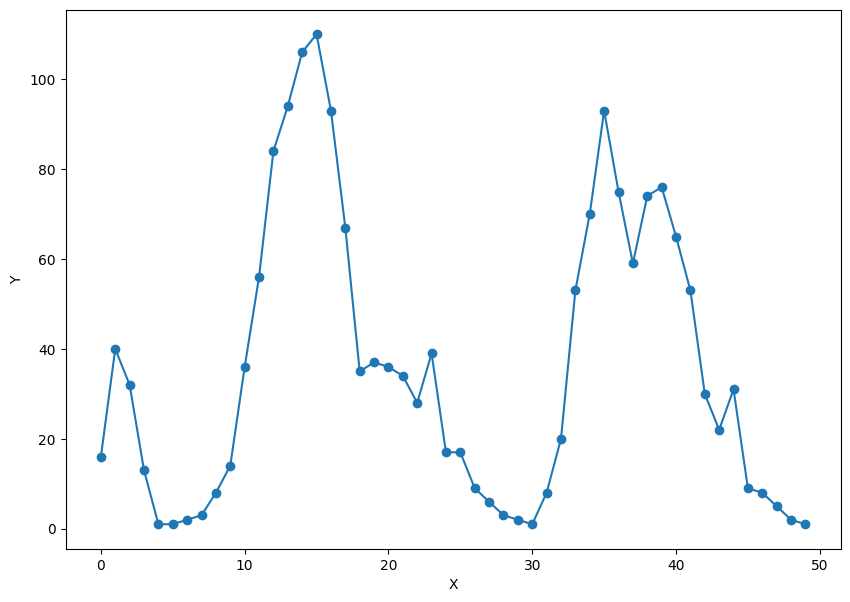

In [6]:
# plot data
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')

In [43]:
# convert x and y to float tensor
x = torch.FloatTensor(x/len(counts))
y = torch.FloatTensor(y)
x, y

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([ 16.,  40.,  32.,  13.,   1.,   1.,   2.,   3.,   8.,  14.,  36.,  56.,
          84.,  94., 106., 110.,  93.,  67.,  35.,  37.,  36.,  34.,  28.,  39.,
          17.,  17.,   9.,   6.,   3.,   2.,   1.,   8.,  20.,  53.,  70.,  93.,
          75.,  59.,  74.,  76.,  65.,  53.,  30.,  22.,  31.,   9.,   8.,   5.,
           2.,   1.]))

In [44]:
# set the learning rate
learning_rate = 0.001
losses = []
x1 = x.view(50, -1)
y1 = y.view(50, -1)
x1, y1

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[ 16.],
         [ 40.],
         [ 32.

In [48]:
# set count of hidden neuron
sz = 10
# initialize the weights from input level to hidden level
weights = torch.randn((1, sz), requires_grad=True)
# initialize the biases for hidden level
biases = torch.randn(sz, requires_grad=True)
# initialize the weights from hidden level to output level
weights2 = torch.randn((sz, 1), requires_grad=True)
for i in range(200000):
    hidden = x1 * weights + biases
    hidden = torch.sigmoid(hidden)
    predictions = hidden.mm(weights2)
    loss = torch.mean((predictions - y1) ** 2)
    losses.append(loss.data.numpy())
    
    if i % 1000 == 0:
        print("loss: ", loss)
        
    loss.backward()
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss:  tensor(2439.3809, grad_fn=<MeanBackward0>)
loss:  tensor(1009.0750, grad_fn=<MeanBackward0>)
loss:  tensor(1004.8408, grad_fn=<MeanBackward0>)
loss:  tensor(994.5719, grad_fn=<MeanBackward0>)
loss:  tensor(981.6936, grad_fn=<MeanBackward0>)
loss:  tensor(967.8298, grad_fn=<MeanBackward0>)
loss:  tensor(952.7748, grad_fn=<MeanBackward0>)
loss:  tensor(936.8130, grad_fn=<MeanBackward0>)
loss:  tensor(921.2751, grad_fn=<MeanBackward0>)
loss:  tensor(905.9677, grad_fn=<MeanBackward0>)
loss:  tensor(888.9328, grad_fn=<MeanBackward0>)
loss:  tensor(869.4590, grad_fn=<MeanBackward0>)
loss:  tensor(847.7574, grad_fn=<MeanBackward0>)
loss:  tensor(823.6654, grad_fn=<MeanBackward0>)
loss:  tensor(796.8071, grad_fn=<MeanBackward0>)
loss:  tensor(767.8135, grad_fn=<MeanBackward0>)
loss:  tensor(737.9260, grad_fn=<MeanBackward0>)
loss:  tensor(708.5922, grad_fn=<MeanBackward0>)
loss:  tensor(680.8748, grad_fn=<MeanBackward0>)
loss:  tensor(655.2701, grad_fn=<MeanBackward0>)
loss:  tensor(631

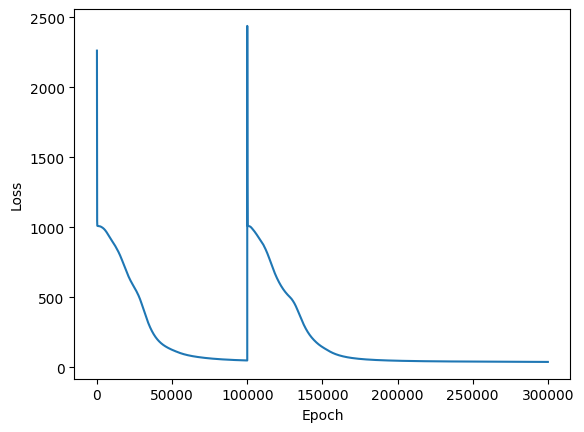

In [49]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

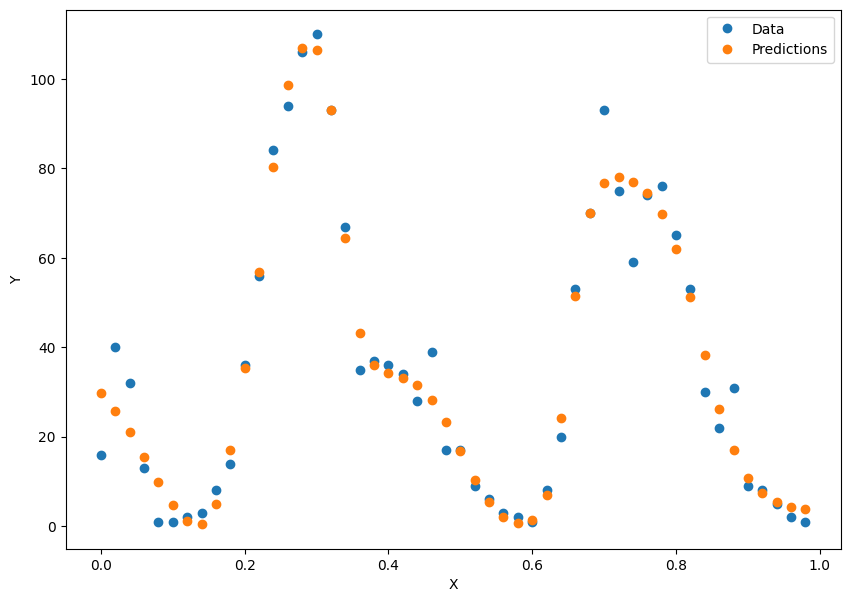

In [50]:
x_data = x1.data.numpy()
plt.figure(figsize=(10, 7))
xplot = plt.plot(x_data, y1.data.numpy(), 'o', label='Data')
yplot = plt.plot(x_data, predictions.data.numpy(), 'o', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()